# ĐỒ ÁN CUỐI KỲ - PHÂN TÍCH DỮ LIỆU BẢO TOÀN TÍNH RIÊNG TƯ

## THÀNH VIÊN NHÓM:

- 22120304 - Nguyễn Thị Kim Quý

- 22120338 - Đỗ Hạnh Thảo

- 22120352 - Phạm Nguyễn Quang Thoại

In [39]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### 1. Đọc file

In [40]:
train_data = pd.read_csv('train.csv')

print("Số dòng trong train.csv", len(train_data))
print(f"\nSố cột: {len(train_data.columns)}")
print("Tên các cột:", list(train_data.columns))
print("\n 5 dòng đầu trong train.csv:\n")
print(train_data.head())

Số dòng trong train.csv 1317

Số cột: 20
Tên các cột: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

 5 dòng đầu trong train.csv:

        Make                                    Model    Price  Year  Kilometer Fuel Type Transmission   Location   Color   Owner Seller Type   Engine           Max Power         Max Torque  \
0  Ssangyong                               Rexton RX7   975000  2013      72000    Diesel    Automatic  Bangalore  Silver   First  Individual  2696 cc  184 bhp @ 4000 rpm  402 Nm @ 3000 rpm   
1    Hyundai  Creta SX (O) 1.5 Petrol CVT [2020-2022]  1748999  2022       2670    Petrol    Automatic    Kolkata   White   First  Individual  1497 cc  113 bhp @ 6300 rpm  144 Nm @ 4500 rpm   
2       Audi                     A4 2.0 TDI (143 bhp)  1150000  2012      40031    Diesel   

### 2. Tiền xử lý dữ liệu

In [41]:
# Hàm trích xuất số từ chuỗi
def extract_number(s):
    if pd.isna(s):
        return np.nan
    match = re.search(r'(\d+)', str(s).replace(',', ''))
    if match:
        return int(match.group(1))
    return np.nan

# Hàm mã hóa nhãn
def label_encode(series):
    uniques = series.dropna().unique()
    mapping = {k: v for v, k in enumerate(sorted(uniques))}
    encoded = series.map(mapping)
    return encoded, mapping

In [42]:
# Bước 1: Trích số từ các cột chuỗi số
for col in ['Engine', 'Max Power', 'Max Torque']:
    train_data[col] = train_data[col].apply(extract_number)
    
# Bước 2: Label encoding thủ công cho các cột phân loại
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 
                    'Color', 'Owner', 'Seller Type', 'Drivetrain']
mappings = {}
# Lưu mode để xử lý NaN trong test
categorical_modes = {}
categorical_means = {}
categorical_stds = {}
train_data_means = {}
train_data_stds = {}

# print("Missing before fill:")
# print(train_data[categorical_cols].isna().sum())    

# Với categorical NaN -> Điền thiếu bằng mode (giá trị xuất hiện nhiều nhất)
for col in categorical_cols:
    mode = train_data[col].mode()[0]  # lấy giá trị xuất hiện nhiều nhất
    train_data[col] = train_data[col].fillna(mode)

# In ra giá trị được fill
for col in categorical_cols:
    mode = train_data[col].mode()[0]
    categorical_modes[col] = mode
    # print(f"Mode of {col}: {mode}")

# Label encoding
for col in categorical_cols:
    train_data[col], mappings[col] = label_encode(train_data[col])

# Chuẩn hóa dữ liệu categorical
for col in categorical_cols:
    mean = train_data[col].mean()
    std = train_data[col].std()
    if std == 0:
        std = 1e-8  # tránh chia 0
    categorical_means[col] = mean
    categorical_stds[col] = std
    train_data[col] = (train_data[col] - mean) / std
    
# Với numeric NaN -> trung bình cột train
numeric_cols = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 
                'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

for col in numeric_cols:
    mean = train_data[col].mean()
    std = train_data[col].std()
    if std == 0:
        std = 1e-8
    train_data_means[col] = mean
    train_data_stds[col] = std
    train_data[col] = train_data[col].fillna(mean)
    train_data[col] = (train_data[col] - mean) / std


# Bước 5: Tách X và Y
y_train = train_data['Price']
X_train = train_data.drop(columns=['Price'])

print("Sau khi tiển xử lý dữ liệu cho train_data: ")

print("Train.shape = ", X_train.shape)
print("Các cột trong X_train:", list(X_train.columns))
print("Tổng số cột trong X_train:", len(X_train.columns))
print("\n 5 dòng đầu trong X_train đã xử lý:\n")
pd.set_option('display.max_columns', None)  # Hiện tất cả các cột
pd.set_option('display.width', 200)         # Tăng chiều rộng hiển thị
print(X_train.head())

Sau khi tiển xử lý dữ liệu cho train_data: 
Train.shape =  (1317, 19)
Các cột trong X_train: ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Tổng số cột trong X_train: 19

 5 dòng đầu trong X_train đã xử lý:

       Make     Model      Year  Kilometer  Fuel Type  Transmission  Location     Color     Owner  Seller Type    Engine  Max Power  Max Torque  Drivetrain    Length     Width    Height  \
0  1.397994  0.572208 -0.989540   0.274506  -0.902065     -1.089406 -1.301665  0.663426 -0.492233     0.186028  1.472613   0.816855    1.073272   -1.916269  1.042822  0.950313  1.437051   
1 -0.778030 -0.749163  1.644419  -0.817523   1.088752     -1.089406  0.194324  0.848421 -0.492233     0.186028 -0.315973  -0.262455   -0.726814   -0.048226  0.032203  0.151263  0.324015   
2 -1.624262 -1.573426 -1.282202  -0.2

### 3.1 - 3.2: Xây dựng mô hình và huấn luyện

Mô hình: Linear Regression

Thuật toán tối ưu: Stochastic Gradient Descent

**Các cột dữ liệu được chọn**:

- Year: Năm sản xuất ảnh hưởng đến độ mới, giá trị còn lại.

- Kilometer: Số km đã đi là chỉ số hao mòn – ảnh hưởng trực tiếp đến giá.

- Fuel Type: Xe chạy xăng, dầu hay điện có mức giá khác nhau.

- Transmission: Xe số sàn thường rẻ hơn xe số tự động.

- Engine: Dung tích/mã lực động cơ ảnh hưởng đến giá xe.

- Max Power: Công suất phản ánh hiệu năng, thường đi kèm giá.

- Seating Capacity: Xe 4 chỗ, 7 chỗ, 9 chỗ có giá khác nhau.

- Fuel Tank Capacity: Phụ nhưng vẫn phản ánh phần nào kích thước/loại xe.

**Các công thức hồi quy sẽ sử dụng**:

- **y = a1x1 + a2x2 + a3x3 + a4x4**: Đây là mô hình hồi quy tuyến tính đơn giản, chuẩn, rất ổn cho baseline.

- **y = a1x1^2 + a2x2 + a3x3^2 + a4x4**: Đây là kỹ thuật polynomial features, giúp mô hình có thể nắm bắt được quan hệ phi tuyến.

- **y = a1(x1 + x2) + a3x3^ + a4x4**: Có các tương tác tiềm năng sau:

    - Year + Kilometer: Xe mới + số kilomet đã chạy ít -> giá cao

    - Make và Model: kết hợp thương hiệu + dòng xe đặc biệt -> đắt tiền.

    - Fuel Type và Engine / Max Power / Max Torque: Xe điện có thể có cấu hình động cơ và công suất khác biệt với xe xăng/dầu, tương tác giữa loại nhiên liệu và hiệu năng động cơ có thể quan trọng.

    - Seating Capacity và Fuel Tank Capacity: Xe nhiều chỗ thường có bình nhiên liệu lớn hơn, tương tác giúp phân biệt phân khúc xe.
    
    - Transmission và DriveTrain: Ví dụ xe số tự động + hệ dẫn động 4 bánh có thể giá cao hơn số sàn + dẫn động cầu trước.

- **y = a1x1x2 + a3x3^2**:
Cũng có các tương tác như trên

- **Regularized Linear Regression: Ridge Regression (L2 Regularization)**: λ∑(ai^2): Tránh overfitting

In [43]:
cols = ['Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine', 'Max Power', 'Seating Capacity', 'Fuel Tank Capacity']
X_train_official = X_train[cols]

print("Columns in X_train:", list(X_train_official.columns))
print("5 dòng dữ liệu đầu:\n", X_train_official.head())

Columns in X_train: ['Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine', 'Max Power', 'Seating Capacity', 'Fuel Tank Capacity']
5 dòng dữ liệu đầu:
        Year  Kilometer  Fuel Type  Transmission    Engine  Max Power  Seating Capacity  Fuel Tank Capacity
0 -0.989540   0.274506  -0.902065     -1.089406  1.472613   0.816855          2.073393            1.634849
1  1.644419  -0.817523   1.088752     -1.089406 -0.315973  -0.262455         -0.381535           -0.154636
2 -1.282202  -0.229044  -0.902065     -1.089406  0.000000   0.000000          0.000000            0.000000
3  0.473770  -0.024767   1.088752     -1.089406 -0.763493  -0.748905         -0.381535           -0.602007
4  0.181108  -0.094214   1.088752      0.917234 -0.763493  -0.733703         -0.381535           -0.474187


In [44]:
# Tính mean và std của y_train
y_mean = y_train.mean()
y_std = y_train.std()

# Chuẩn hóa y_train
y_train_scaled = (y_train - y_mean) / y_std

In [45]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sgd_linear_regression(X, y, transform_fn, lr=1e-6, max_epoch=500, lambda_l2=0.0):
    n_samples = X.shape[0]
    X_transformed = transform_fn(X)
    n_features = X_transformed.shape[1]
    weights = np.zeros(n_features)

    for epoch in range(max_epoch):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        for i in indices:
            xi = X_transformed[i]
            yi = y[i]
            y_pred = np.dot(weights, xi)
            error = y_pred - yi
            gradient = error * xi + 2 * lambda_l2 * weights

            if np.any(np.isnan(gradient)) or np.any(np.isinf(gradient)):
                print(f"Warning: gradient NaN/Inf at epoch {epoch}, sample {i}")
                continue

            weights_new = weights - lr * gradient
            if np.any(np.isnan(weights_new)) or np.any(np.isinf(weights_new)):
                print(f"Warning: weights overflow at epoch {epoch}, sample {i}")
                continue

            weights = weights_new

        if epoch % 10 == 0:
            y_pred_scaled = np.dot(X_transformed, weights)
            
            # Tính MSE trên dữ liệu đã chuẩn hóa
            mse_scaled = mean_squared_error(y, y_pred_scaled)
            
            # Tính MSE trên đơn vị gốc
            y_pred_original = y_pred_scaled * y_std + y_mean
            y_original = y * y_std + y_mean
            mse_original = mean_squared_error(y_original, y_pred_original)
            
            # print(f"Epoch {epoch}:")
            # print(f"   ➤ MSE (chuẩn hóa): {mse_scaled:.4f}")
            # print(f"   ➤ MSE (đơn vị gốc): {mse_original:.2f}")

    # Sau khi huấn luyện xong
    y_pred_scaled = np.dot(X_transformed, weights)
    mse_scaled = mean_squared_error(y, y_pred_scaled)
    y_pred_original = y_pred_scaled * y_std + y_mean
    y_original = y * y_std + y_mean
    mse_original = mean_squared_error(y_original, y_pred_original)

    return weights, mse_original, mse_scaled


In [46]:
def formula_1(X):  
    return X[:, [0, 1, 2, 3, 4, 5, 6, 7]]

def formula_2(X):  
    return np.column_stack((X[:,0]**2, X[:,1], X[:,2]**2, X[:,3], X[:,4]**2, X[:,5], X[:,6]**2, X[:,7]))

def formula_3(X):  
    x1_plus_x2 = X[:,0] + X[:,1]
    x3_plus_x5 = X[:,2] + X[:,4]
    x7_plus_x8 = X[:,6] + X[:,7]
    return np.column_stack((x1_plus_x2, x3_plus_x5, X[:,3]**2, X[:,5], x7_plus_x8))

def formula_4(X):  
    x1x2 = X[:,0] * X[:,1]
    x3x5 = X[:,2] * X[:,4]
    x7x8 = X[:,6] * X[:,7]
    return np.column_stack((x1x2, x3x5, X[:,3]**2, X[:,5]**2, x7x8))

def formula_5_ridge(X):  
    return X

def run_all_formulas(X_train, y_train):
    formulas = [formula_1, formula_2, formula_3, formula_4, formula_5_ridge]
    names = [
        "Công thức 1: y = a1x1 + a2x2 + a3x3 + a4x4 + a5x5 + a6x6 + a7x7 + a8x8",
        "Công thức 2: y = a1x1^2 + a2x2 + a3x3^2 + a4x4 + a5x5^2 + a6x6 + a7x7^2 + a8x8",
        "Công thức 3: y = a1(x1 + x2) + a3(x3 + x5) + a4x4^2 + a7(x7 + x8)",
        "Công thức 4: y = a1x1x2 + a3x3x5 + a3x3^2 + a6x6^2 + a7x7x8",
        "Công thức 5: Ridge Regression (8 cột)"
    ]

    for i, formula in enumerate(formulas):
        lambda_l2 = 0.1 if i == 4 else 0.0
        weights, mse, mse_scaled = sgd_linear_regression(X_train, y_train, formula, lambda_l2=lambda_l2)
        print(f"Công thức: {names[i]}")
        print(f"MSE: {mse:.2f}")
        print(f"MSE (chuẩn hoá): {mse_scaled:.2f}\n")
        print(f"Weights: {weights}\n")

In [47]:
# run_all_formulas(X_train_official.values, y_train_scaled.values)

In [48]:
weights1, mse1, mse_scaled1 = sgd_linear_regression(X_train_official.values, y_train_scaled.values, formula_1, lambda_l2=0.0)
print(f"Công thức 1:")
print(f"MSE: {mse1:.2f}")
print(f"MSE (chuẩn hoá): {mse_scaled1:.2f}\n")
print(f"Weights: {weights1}\n")

Công thức 1:
MSE: 2475479560138.62
MSE (chuẩn hoá): 0.43

Weights: [ 0.1316825  -0.05766662 -0.01601103 -0.12533614  0.16988198  0.23961595
 -0.03903926  0.15814643]



In [49]:
weights2, mse2, mse_scaled2 = sgd_linear_regression(X_train_official.values, y_train_scaled.values, formula_2, lambda_l2=0.0)
print(f"Công thức 2:")
print(f"MSE: {mse2:.2f}")
print(f"MSE (chuẩn hoá): {mse_scaled2:.2f}")
print(f"Weights: {weights2}\n")

Công thức 2:
MSE: 2689736561807.51
MSE (chuẩn hoá): 0.46
Weights: [-0.01118226 -0.06559969 -0.05004924 -0.14464282  0.08880182  0.2164272
 -0.00189359  0.17415009]



In [50]:
weights3, mse3, mse_scaled3 = sgd_linear_regression(X_train_official.values, y_train_scaled.values, formula_3, lambda_l2=0.0)
print(f"Công thức 3:")
print(f"MSE: {mse3:.2f}")
print(f"MSE (chuẩn hoá): {mse_scaled3:.2f}")
print(f"Weights: {weights3}\n")

Công thức 3:
MSE: 3214611448470.07
MSE (chuẩn hoá): 0.55
Weights: [0.06622971 0.1324208  0.0244991  0.29151042 0.11704202]



In [51]:
weights4, mse4, mse_scaled4 = sgd_linear_regression(X_train_official.values, y_train_scaled.values, formula_4, lambda_l2=0.0)
print(f"Công thức 4:")
print(f"MSE: {mse4:.2f}")
print(f"MSE (chuẩn hoá): {mse_scaled4:.2f}")
print(f"Weights: {weights4}\n")

Công thức 4:
MSE: 4038245204323.95
MSE (chuẩn hoá): 0.70
Weights: [-0.01331704 -0.00132614 -0.0335744   0.17686144 -0.04030835]



In [52]:
weights5, mse5, mse_scaled5 = sgd_linear_regression(X_train_official.values, y_train_scaled.values, formula_5_ridge, lambda_l2=0.1)
print(f"Công thức 5:")
print(f"MSE: {mse5:.2f}")
print(f"MSE (chuẩn hoá): {mse_scaled5:.2f}")
print(f"Weights: {weights5}\n")

Công thức 5:
MSE: 2530496960415.36
MSE (chuẩn hoá): 0.44
Weights: [ 0.12461338 -0.05468227 -0.0161874  -0.12029562  0.16251893  0.22816794
 -0.03609434  0.15139517]



In [53]:
mse_list = [mse1, mse2, mse3, mse4, mse5]
mse_scaled_list = [mse_scaled1, mse_scaled2, mse_scaled3, mse_scaled4, mse_scaled5]
best_formula_index = mse_list.index(min(mse_list)) 

print(f"Công thức tốt nhất là công thức {best_formula_index + 1} với MSE = {min(mse_list):.2f}\n Và MSE (chuẩn hoá): {mse_scaled_list[best_formula_index]}")


Công thức tốt nhất là công thức 1 với MSE = 2475479560138.62
 Và MSE (chuẩn hoá): 0.4270518394658288


### Đọc file test.csv

In [54]:
test_data = pd.read_csv('test.csv')
print("Số dòng trong test.csv", len(test_data))
print(f"\nSố cột: {len(test_data.columns)}")
print("Tên các cột:", list(test_data.columns))
print("\n 5 dòng đầu trong test.csv:\n")
print(test_data.head())

Số dòng trong test.csv 330

Số cột: 20
Tên các cột: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

 5 dòng đầu trong test.csv:

            Make                           Model    Price  Year  Kilometer Fuel Type Transmission  Location   Color   Owner Seller Type   Engine           Max Power         Max Torque Drivetrain  \
0           Ford      Endeavour Trend 2.2 4x2 AT  2350000  2016      75000    Diesel    Automatic    Mohali   White  Second  Individual  2198 cc  158 bhp @ 3200 rpm  385 Nm @ 1600 rpm        RWD   
1         Toyota  Urban Cruiser Premium Grade AT  1050000  2021       1910    Petrol    Automatic  Varanasi   White   First  Individual  1462 cc  103 bhp @ 6000 rpm  138 Nm @ 4400 rpm        FWD   
2  Maruti Suzuki                    Alto 800 Lxi   210000  2014      42505    Pe

In [55]:
# Bước 1: Trích số từ các cột chuỗi số
for col in ['Engine', 'Max Power', 'Max Torque']:
    test_data[col] = test_data[col].apply(extract_number)

# Bước 2: Xử lý các cột phân loại
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 
                    'Color', 'Owner', 'Seller Type', 'Drivetrain']

# Điền thiếu bằng mode đã lưu từ train
for col in categorical_cols:
    mode = categorical_modes[col]  # dùng mode từ train
    test_data[col] = test_data[col].fillna(mode)

# Label encoding: dùng mapping từ train, gán -1 cho giá trị không có trong train
for col in categorical_cols:
    test_data[col] = test_data[col].map(mappings[col])
    test_data[col] = test_data[col].fillna(-1)  # gán -1 cho giá trị chưa từng thấy

# Chuẩn hóa categorical: dùng mean/std từ train
for col in categorical_cols:
    mean = categorical_means[col]
    std = categorical_stds[col] if categorical_stds[col] != 0 else 1e-8
    test_data[col] = (test_data[col] - mean) / std

# Bước 3: Xử lý các cột numeric
numeric_cols = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 
                'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Điền NaN bằng trung bình từ train
for col in numeric_cols:
    mean = train_data_means[col]
    test_data[col] = test_data[col].fillna(mean)

# Chuẩn hóa numeric: dùng mean/std từ train
for col in numeric_cols:
    mean = train_data_means[col]
    std = train_data_stds[col] if train_data_stds[col] != 0 else 1e-8
    test_data[col] = (test_data[col] - mean) / std

# Bước 4: Tách X và Y
y_test = test_data['Price']
X_test = test_data.drop(columns=['Price'])

# In thông tin để kiểm tra
print("Sau khi tiền xử lý dữ liệu cho test_data:")
print("Test.shape = ", X_test.shape)
print("Các cột trong X_test:", list(X_test.columns))
print("\n5 dòng đầu trong X_test đã xử lý:\n")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
print(X_test.head())


Sau khi tiền xử lý dữ liệu cho test_data:
Test.shape =  (330, 19)
Các cột trong X_test: ['Make', 'Model', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

5 dòng đầu trong X_test đã xử lý:

       Make     Model      Year  Kilometer  Fuel Type  Transmission  Location     Color     Owner  Seller Type    Engine  Max Power  Max Torque  Drivetrain    Length     Width    Height  \
0 -1.019811 -1.717884 -0.111554   0.321759  -0.902065     -1.089406  0.637580  0.848421  1.636735     0.186028  0.729731   0.421614    0.954662    1.819817  1.347118  0.659749  1.822903   
1  1.639775 -1.717884  1.351757  -0.829494   1.088752     -1.089406  2.133570  0.848421 -0.492233     0.186028 -0.368184  -0.414471   -0.768676   -0.048226 -0.645245  0.151263  0.361116   
2  0.430872 -1.475704 -0.696878  -0.190075   1.088752      0.917234  1.357

In [56]:
X_test_official = X_test[cols]
print("Columns in X_test:", list(X_test_official.columns))
print("5 dòng dữ liệu đầu:\n", X_test_official.head())

Columns in X_test: ['Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Engine', 'Max Power', 'Seating Capacity', 'Fuel Tank Capacity']
5 dòng dữ liệu đầu:
        Year  Kilometer  Fuel Type  Transmission    Engine  Max Power  Seating Capacity  Fuel Tank Capacity
0 -0.111554   0.321759  -0.902065     -1.089406  0.729731   0.421614          2.073393            1.762669
1  1.351757  -0.829494   1.088752     -1.089406 -0.368184  -0.414471         -0.381535           -0.282456
2 -0.696878  -0.190075   1.088752      0.917234 -1.361677  -1.265757         -0.381535           -1.113289
3 -0.696878   0.479271  -0.902065      0.917234 -0.314482  -0.475277         -0.381535           -0.793738
4  0.473770   0.243003   1.088752      0.917234 -1.334826  -1.144145         -0.381535           -1.305019


In [57]:
# Tính mean và std của y_train
y_test_mean = y_train.mean()
y_test_std = y_train.std()

# Chuẩn hóa y_train
y_test_scaled = (y_test - y_test_mean) / y_test_std

In [58]:
mse_test_list = []
mse_test_scaled_list = []

for i, (weights, formula) in enumerate(zip(
    [weights1, weights2, weights3, weights4, weights5],
    [formula_1, formula_2, formula_3, formula_4, formula_5_ridge]
), 1):
    # Biến đổi X_test theo công thức
    X_test_transformed = formula(X_test_official.values)
    
    # Dự đoán chuẩn hóa
    y_pred_scaled = np.dot(X_test_transformed, weights)
    
    # Dự đoán đơn vị gốc
    y_pred_original = y_pred_scaled * y_std + y_mean

    # MSE chuẩn hóa (so với y_test_scaled)
    mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
    mse_test_scaled_list.append(mse_scaled)

    # MSE đơn vị gốc (so với y_test thật)
    mse_original = mean_squared_error(y_test, y_pred_original)
    mse_test_list.append(mse_original)

    # In kết quả
    print(f"Công thức {i}:")
    print(f"-> MSE (chuẩn hóa): {mse_scaled:.4f}")
    print(f"-> MSE (đơn vị gốc): {mse_original:.2f}")
    print("-" * 40)

# Tìm công thức tốt nhất (dựa trên MSE gốc)
best_index = mse_test_list.index(min(mse_test_list)) + 1
print(f"\nCông thức tốt nhất trên tập test là: Công thức {best_index}")

Công thức 1:
-> MSE (chuẩn hóa): 0.3219
-> MSE (đơn vị gốc): 1865909306030.01
----------------------------------------
Công thức 2:
-> MSE (chuẩn hóa): 0.3320
-> MSE (đơn vị gốc): 1924671568021.79
----------------------------------------
Công thức 3:
-> MSE (chuẩn hóa): 0.4175
-> MSE (đơn vị gốc): 2419983973808.40
----------------------------------------
Công thức 4:
-> MSE (chuẩn hóa): 0.4658
-> MSE (đơn vị gốc): 2700327785841.75
----------------------------------------
Công thức 5:
-> MSE (chuẩn hóa): 0.3290
-> MSE (đơn vị gốc): 1907311721595.16
----------------------------------------

Công thức tốt nhất trên tập test là: Công thức 1


### 3.3 Thêm nhiễu

In [59]:
# Lưu mean và std để chuẩn hóa và phục hồi lại đơn vị gốc
y_mean = y_train.mean()
y_std = y_train.std()

# Chuẩn hóa y_train
y_train_scaled = (y_train - y_mean) / y_std

# Hàm thêm nhiễu Laplace vào dữ liệu X (chuẩn hóa)
def add_laplace_noise(X, epsilon=1.0, sensitivity=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale, size=X.shape)
    return X + noise

# Các giá trị epsilon cần thử
epsilon_values = [0.5, 1, 20]   # tương ứng với các mức: <1, 1-10, >10

# # Kết quả lưu độ chính xác tương ứng với mỗi epsilon
# results = []

# for eps in epsilon_values:
#     X_train_dp = add_laplace_noise(X_train, epsilon=eps)

#     # Huấn luyện mô hình tuyến tính: y = Xw + b
#     X_b = np.c_[np.ones((X_train_dp.shape[0], 1)), X_train_dp]  # thêm bias
#     theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_train_scaled

#     # Dự đoán và tính MSE trên tập train (dạng chuẩn hóa)
#     y_pred_scaled = X_b @ theta
#     mse_scaled = np.mean((y_pred_scaled - y_train_scaled) ** 2)

#     # Phục hồi y_pred về đơn vị gốc
#     y_pred_real = y_pred_scaled * y_std + y_mean
#     mse_real = np.mean((y_pred_real - y_train) ** 2)

#     results.append((eps, mse_scaled, mse_real))

#     print(f"Epsilon = {eps}, MSE (chuẩn hóa) = {mse_scaled:.4f}, MSE (gốc) = {mse_real:.2f}")

# Lưu kết quả
results = []

for eps in epsilon_values:
    # Thêm nhiễu vào X_train
    X_train_dp = add_laplace_noise(X_train, epsilon=eps)

    # Dùng mô hình SGD Linear Regression với dữ liệu đã bị nhiễu
    weights1, mse1, mse_scaled1 = sgd_linear_regression(
        X_train_dp.values, y_train_scaled.values, formula_1, lambda_l2=0.0
    )

    results.append((eps, mse_scaled1, mse1))

    print(f"ε = {eps} → Công thức 1:")
    print(f"MSE (gốc)       = {mse1:.2f}")
    print(f"MSE (chuẩn hoá) = {mse_scaled1:.4f}")
    print(f"Weights         = {weights1}\n")

ε = 0.5 → Công thức 1:
MSE (gốc)       = 5504410965656.97
MSE (chuẩn hoá) = 0.9496
Weights         = [-0.01169835 -0.00840517  0.03287716 -0.01404447 -0.02163466 -0.0531078
 -0.01228119 -0.02013884]

ε = 1 → Công thức 1:
MSE (gốc)       = 5142831388954.36
MSE (chuẩn hoá) = 0.8872
Weights         = [-0.00276657 -0.00792643  0.08141063 -0.0296455  -0.02782982 -0.12720209
 -0.01571395 -0.04409308]

ε = 20 → Công thức 1:
MSE (gốc)       = 4335429503828.16
MSE (chuẩn hoá) = 0.7479
Weights         = [-0.00737591 -0.01332315  0.13391982 -0.05162951 -0.06991821 -0.21697588
 -0.05071729 -0.04790172]



In [60]:
### PRIVACY ACCOUNTANT
# Tính ε tích lũy nếu huấn luyện mô hình nhiều lần (basic composition)
def compute_total_epsilon(epsilon_per_iter, n_iter):
    return epsilon_per_iter * n_iter

# Ví dụ: chạy 5 lần với epsilon = 0.5
total_eps = compute_total_epsilon(0.5, 5)
print(f"Tổng epsilon sau 5 lần huấn luyện với ε=0.5 là: {total_eps}")

Tổng epsilon sau 5 lần huấn luyện với ε=0.5 là: 2.5


In [61]:
for eps, mse_scaled, mse_real in results:
    print(f"Với ε = {eps}:  MSE (chuẩn hóa) = {mse_scaled:.4f}, MSE (gốc) = {mse_real:.2f} → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn")

Với ε = 0.5:  MSE (chuẩn hóa) = 0.9496, MSE (gốc) = 5504410965656.97 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn
Với ε = 1:  MSE (chuẩn hóa) = 0.8872, MSE (gốc) = 5142831388954.36 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn
Với ε = 20:  MSE (chuẩn hóa) = 0.7479, MSE (gốc) = 4335429503828.16 → ε nhỏ → riêng tư cao hơn, nhưng độ chính xác thấp hơn


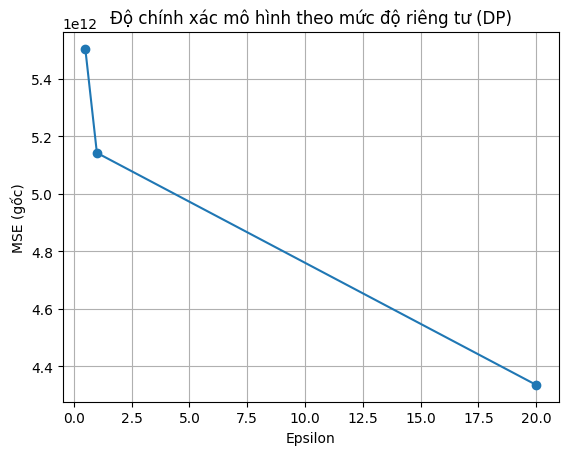

In [62]:
### VẼ BIỂU ĐỒ
plt.plot([r[0] for r in results], [r[2] for r in results], marker='o')  # dùng MSE gốc để vẽ
plt.xlabel('Epsilon')
plt.ylabel('MSE (gốc)')
plt.title('Độ chính xác mô hình theo mức độ riêng tư (DP)')
plt.grid(True)
plt.show()